In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\Telco-Customer-Churn.csv')

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [63]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

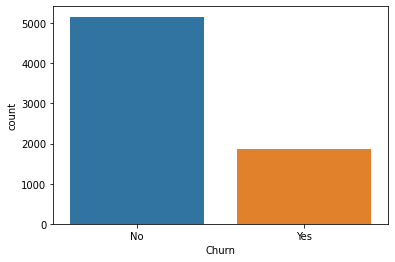

In [64]:
sns.countplot(data = df, x = 'Churn')
plt.show()

In [65]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

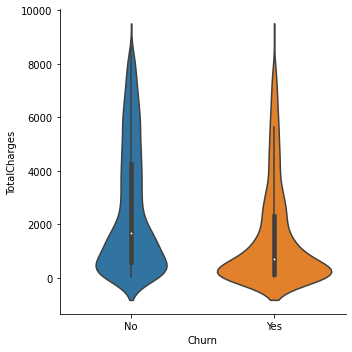

In [66]:
sns.catplot(y='TotalCharges', x = 'Churn', data = df, kind='violin')
plt.show()

<Figure size 1600x900 with 0 Axes>

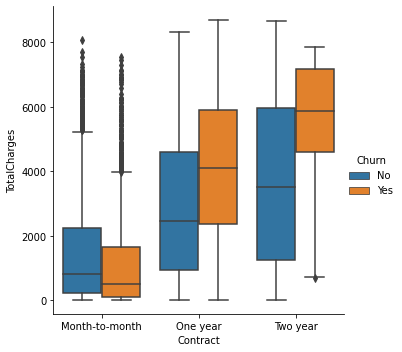

In [67]:
plt.figure(figsize=(16, 9), dpi = 100)
sns.catplot(y='TotalCharges', x = 'Contract', hue = 'Churn', data = df, kind='box')
plt.show()

In [68]:
col_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [69]:
corr_data = pd.get_dummies(df[col_features], drop_first=True).corr()['Churn_Yes'].sort_values()

In [70]:
corr_data = pd.DataFrame(corr_data)

In [71]:
corr_data

,Churn_Yes
Contract_Two year,-0.301552
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
InternetService_No,-0.227578
OnlineBackup_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
TechSupport_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
Contract_One year,-0.178225
OnlineSecurity_Yes,-0.171270


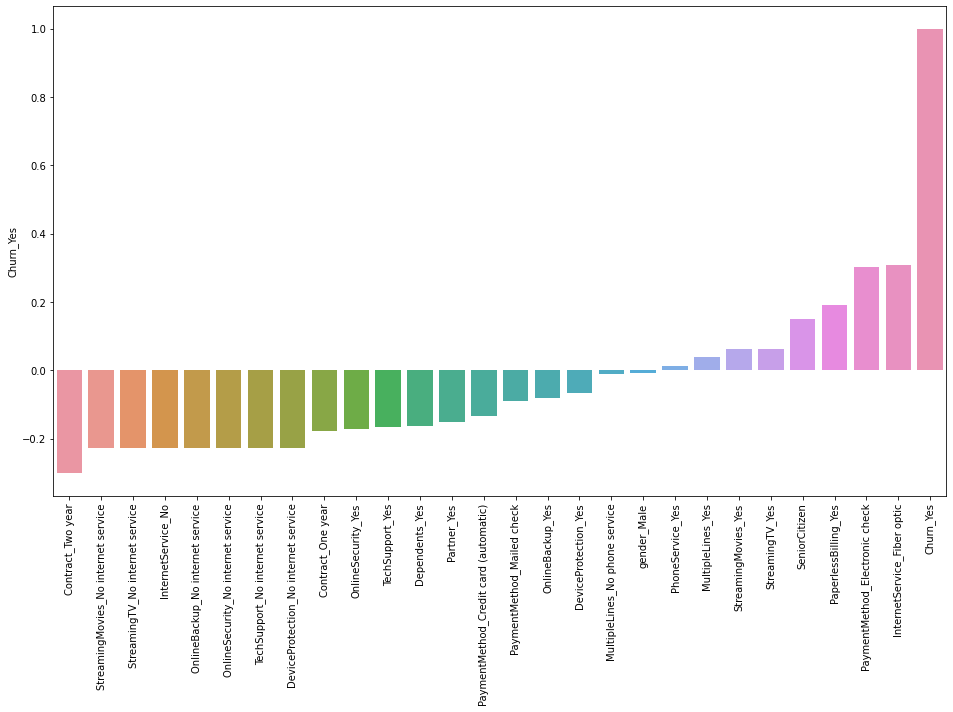

In [72]:
plt.figure(figsize=(16, 9))
sns.barplot(data=corr_data, x=corr_data.index, y='Churn_Yes')
plt.xticks(rotation=90)
plt.show()

In [73]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

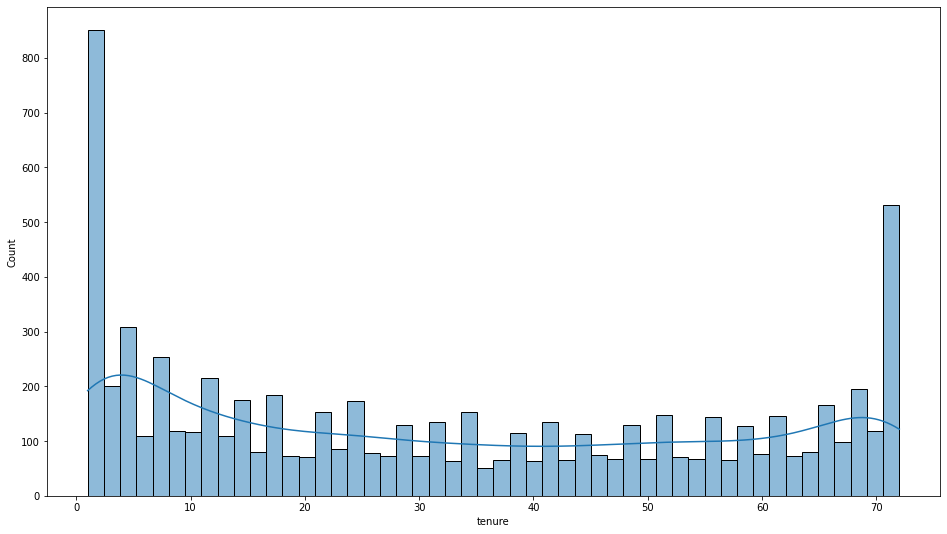

In [74]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df['tenure'], kde=True, bins=50)
plt.show()

<Figure size 2000x600 with 0 Axes>

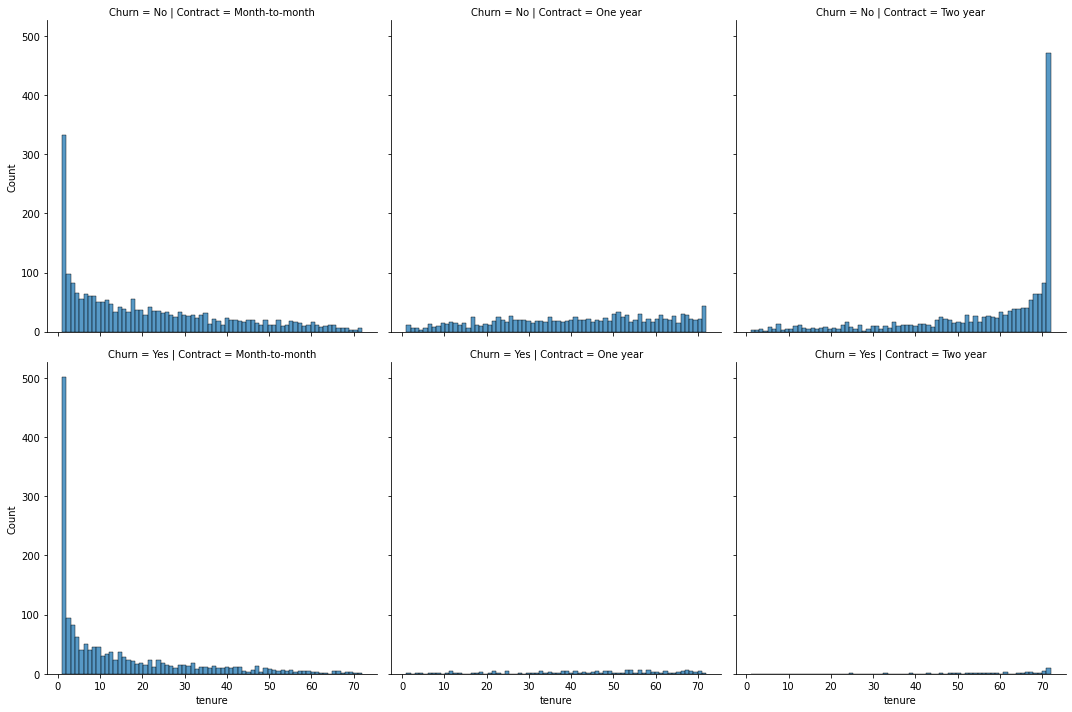

In [75]:
plt.figure(figsize=(10, 3), dpi=200)
sns.displot(data = df, x = 'tenure', bins = 70, col = 'Contract', row='Churn')
plt.show()

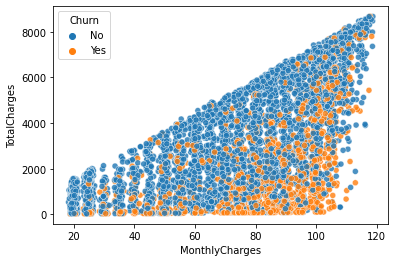

In [76]:
sns.scatterplot(data=df, y = 'TotalCharges', x = 'MonthlyCharges', hue='Churn',alpha=0.8)
plt.show()

In [77]:
res = pd.DataFrame(df[['Churn', 'tenure']].groupby(['tenure', 'Churn']).size())[0].unstack()


In [78]:
res

Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


In [79]:
churn_rates = (res['Yes'] / (res['Yes'] + res['No']))

In [80]:
churn_rates = pd.DataFrame(churn_rates)
churn_rates.reset_index(drop=True, inplace=True)

In [81]:
churn_rates.columns = ['Churn Percentage']

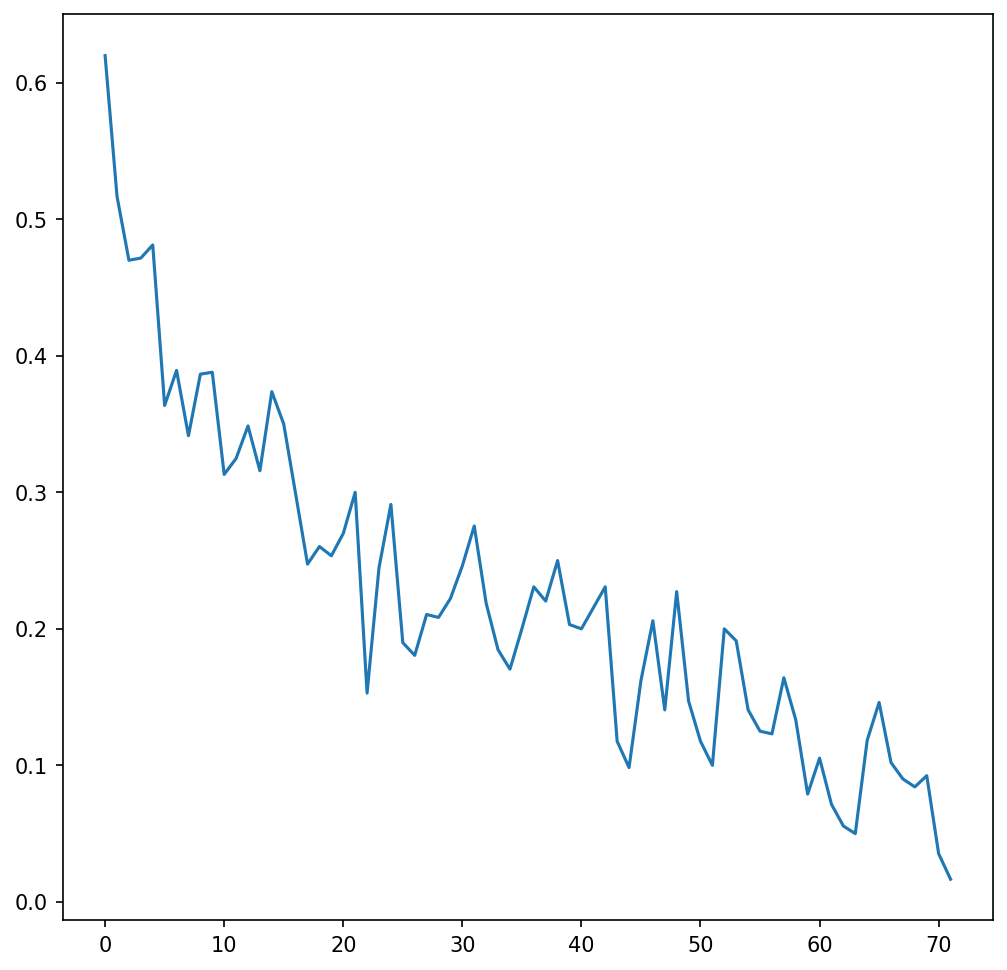

In [82]:
plt.figure(figsize=(8, 8), dpi=150)
plt.plot(churn_rates)
plt.show()

In [83]:
new_columns_feat = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']

In [154]:
df['Tenure Cohort'].at[df[(df['tenure'] > 0) & (df['tenure'] < 12)].index] = new_columns_feat[0]

In [155]:
df['Tenure Cohort'].at[df[(df['tenure'] > 12) & (df['tenure'] < 24)].index] = new_columns_feat[1]

In [156]:
df['Tenure Cohort'].at[df[(df['tenure'] > 24) & (df['tenure'] < 48)].index] = new_columns_feat[2]

In [157]:
df['Tenure Cohort'].at[df[(df['tenure'] > 48)].index] = new_columns_feat[3]

In [158]:
df['Tenure Cohort'].unique()

array(['0-12 Months', '24-48 Months', '12-24 Months', 'Over 48 Months'],
      dtype=object)

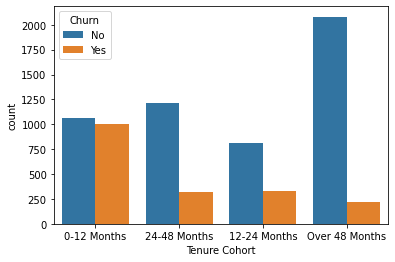

In [172]:
sns.countplot(data = df, x = 'Tenure Cohort', hue='Churn')
plt.show()

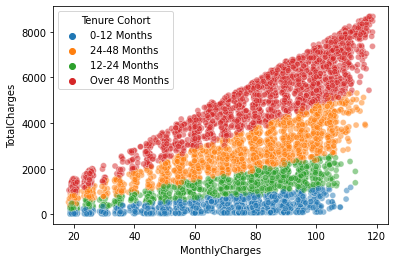

In [191]:
sns.scatterplot(data = df, y = 'TotalCharges', x = 'MonthlyCharges', hue='Tenure Cohort', linewidth=0.5, alpha = 0.5)
plt.show()

<Figure size 2000x600 with 0 Axes>

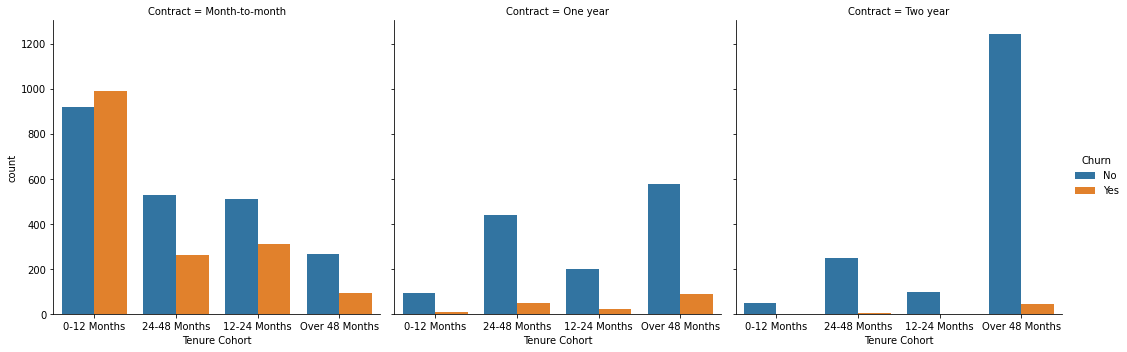

In [193]:
plt.figure(figsize=(10, 3), dpi=200)
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', col = 'Contract', kind='count')
plt.show()

In [201]:
df.drop('customerID', axis = 1, inplace = True)

In [222]:
df = pd.get_dummies(df, drop_first=True)

In [223]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0


In [224]:
X = df.drop('Churn_Yes', axis = 1)

In [225]:
y = df['Churn_Yes']

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [245]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [20, 30, 40],
    'max_leaf_nodes': [16, 20, 30, 40]
}

In [246]:
grid_model = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid)

In [247]:
grid_model.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [16, 20, 30, 40]})

In [248]:
grid_model.best_params_

{'criterion': 'log_loss',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': 20}

In [257]:
grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=40, max_features='auto', max_leaf_nodes=20)

In [249]:
y_pred = grid_model.predict(X_test)

In [250]:
from sklearn.metrics import plot_confusion_matrix, classification_report

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


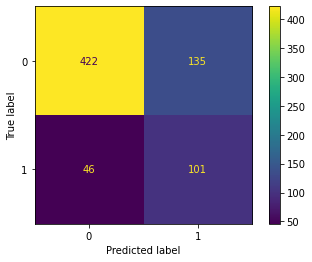

In [251]:
plot_confusion_matrix(grid_model, X_test, y_test)
plt.show()

In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       557
           1       0.43      0.69      0.53       147

    accuracy                           0.74       704
   macro avg       0.66      0.72      0.68       704
weighted avg       0.80      0.74      0.76       704



In [263]:
dt = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=40, max_features='auto', max_leaf_nodes=20)
dt.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=40, max_features='auto', max_leaf_nodes=20)

In [264]:
from sklearn.tree import plot_tree

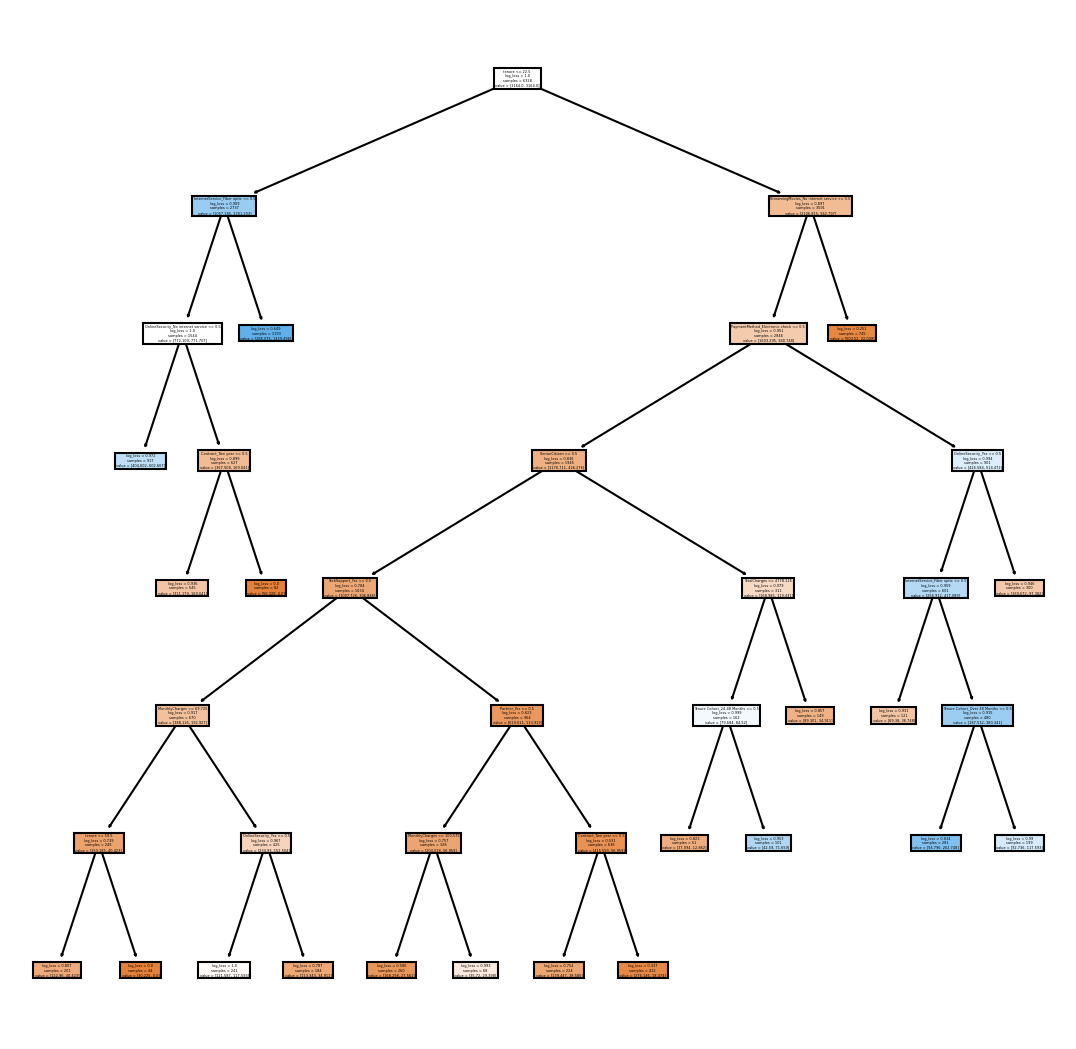

In [266]:
plt.figure(figsize=(9, 9), dpi=150)
plot_tree(dt, filled = True, feature_names=X.columns)
plt.show()

In [291]:
best_est = pd.DataFrame(grid_model.best_estimator_.feature_importances_, columns=['Features Importance'], index=X_train.columns).sort_values('Features Importance')
best_est

,Features Importance
SeniorCitizen,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure Cohort_24-48 Months,0.000000


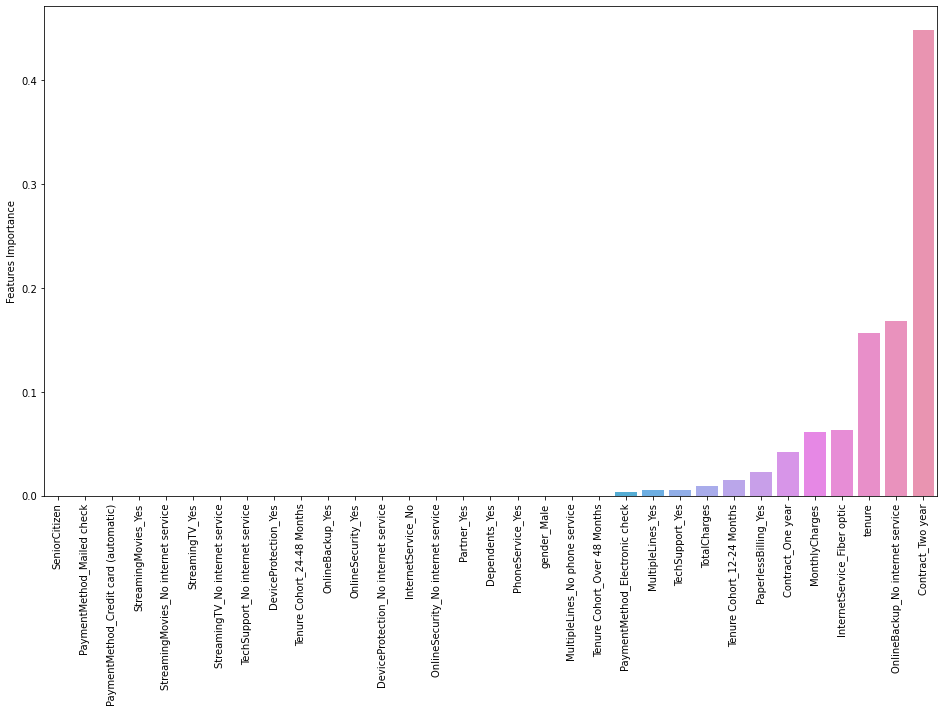

In [297]:
plt.figure(figsize=(16, 9))
sns.barplot(data = best_est, x = best_est.index, y = 'Features Importance')
plt.xticks(rotation=90)
plt.show()

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [20, 40, 60, 80],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [100, 128, 200, 256],
}

In [311]:
rfc_ = GridSearchCV(RandomForestClassifier(class_weight='balanced',bootstrap=True, oob_score=True), param_grid)

In [312]:
rfc_.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 40, 60, 80],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 128, 200, 256]})

In [313]:
rfc_.best_params_

{'criterion': 'log_loss',
 'max_depth': 80,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [314]:
y_pred = rfc_.predict(X_test)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


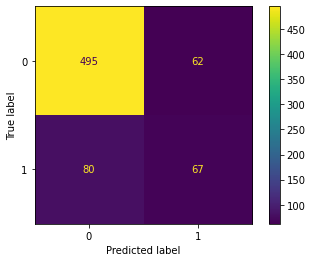

In [316]:
plot_confusion_matrix(rfc_, X_test, y_test)
plt.show()

In [317]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



In [318]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [319]:
ad_model = AdaBoostClassifier()

In [320]:
ad_model.fit(X_train, y_train)

AdaBoostClassifier()

In [321]:
y_pred = ad_model.predict(X_test)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


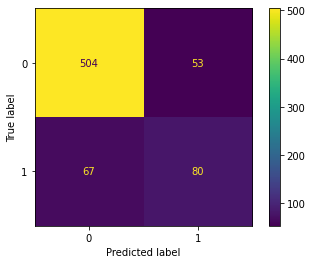

In [322]:
plot_confusion_matrix(ad_model, X_test, y_test)
plt.show()

In [323]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [324]:
gr_model = GradientBoostingClassifier()

In [325]:
gr_model.fit(X_train, y_train)

GradientBoostingClassifier()